In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

In [2]:
path1 = 'E:\\flowers'
categories = {'daisy':0, 'dandelion':0, 'rose':0, 'sunflower':0, 'tulip':0}

categories['daisy']

0

In [3]:
categories_labels = {'daisy':0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4}


In [4]:
features = []
labels = []
for dirc in os.listdir(path1):
    
    flower_path = os.path.join(path1,dirc)
    label = categories_labels[dirc]
    for x in os.listdir(flower_path):
        image_path = os.path.join(flower_path,x)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(224,224))
        image = np.array(image, dtype = np.float32)
        features.append(image)
        labels.append(label)
        
        
        
    

In [5]:
for dirc in os.listdir(path1):
    print(categories_labels[dirc])

0
1
2
3
4


In [6]:
features = np.array(features, dtype = np.float32)
features = features/255
labels = np.array(labels, dtype = np.float32)

In [7]:
labels.shape

(4317,)

In [8]:
x_train,x_test,y_train,y_test =  train_test_split(features,labels, test_size = 0.3)

(3021,)

In [5]:
for category in categories:
    new_path = os.path.join(path1,category)
    for images in os.listdir(new_path):
        categories[category] += 1
        

In [6]:
categories


{'daisy': 764, 'dandelion': 1052, 'rose': 784, 'sunflower': 733, 'tulip': 984}

<BarContainer object of 5 artists>

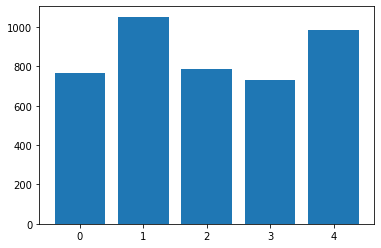

In [7]:
plt.bar(range(len(categories)), list(categories.values()), align='center')

In [29]:

model = tf.keras.Sequential([
    tf.keras.layers.Input([224,224,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation = 'sigmoid')
    
    
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 224, 224, 32)      3232      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_97 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_98 (Conv2D)          (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 96)      

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [31]:
history = model.fit(x_train,y_train, 
          shuffle = True, 
           epochs=10, batch_size = 100)

Epoch 1/10
31/31 [==============================] - 370s 12s/step - loss: 1.4262 - accuracy: 0.3615
Epoch 2/10
31/31 [==============================] - 363s 12s/step - loss: 1.1229 - accuracy: 0.5296
Epoch 3/10
31/31 [==============================] - 358s 12s/step - loss: 1.0255 - accuracy: 0.6087
Epoch 4/10
31/31 [==============================] - 353s 11s/step - loss: 0.9602 - accuracy: 0.6362
Epoch 5/10
31/31 [==============================] - 358s 12s/step - loss: 0.8556 - accuracy: 0.6710
Epoch 6/10
31/31 [==============================] - 365s 12s/step - loss: 0.8115 - accuracy: 0.6918
Epoch 7/10
31/31 [==============================] - 343s 11s/step - loss: 0.7305 - accuracy: 0.7325
Epoch 8/10
31/31 [==============================] - 289s 9s/step - loss: 0.6453 - accuracy: 0.7670
Epoch 9/10
31/31 [==============================] - 290s 9s/step - loss: 0.5709 - accuracy: 0.7928
Epoch 10/10
31/31 [==============================] - 291s 9s/step - loss: 0.4754 - accuracy: 0.8299


In [32]:
result = model.predict(x_train[3][np.newaxis,...])
np.argmax(result)


2

 model.save(model.h5)

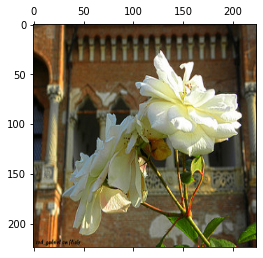

In [17]:
plt.matshow(x_train[3])

In [33]:
y_train[3]

2.0

Text(0, 0.5, 'loss')

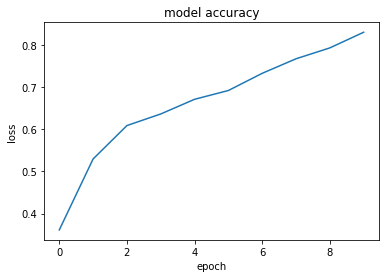

In [36]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

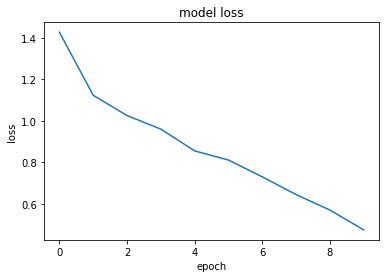

In [37]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

In [70]:
import seaborn as sb
import pandas as pd

In [39]:
y_pred = model.predict(x_test)

In [46]:
for x in range(len(y_pred)):
    y_pred[x] = np.argmax(y_pred[x])

In [53]:
y_pred =np.delete(y_pred,[1,2,3,4],1)

In [67]:
y_pred =y_pred.reshape(1296,)

In [68]:
y_pred.shape

(1296,)

In [69]:
y_test.shape

(1296,)

In [82]:
df = pd.DataFrame(y_test, columns = ['y_test'])

In [84]:
df['y_pred'] = y_pred

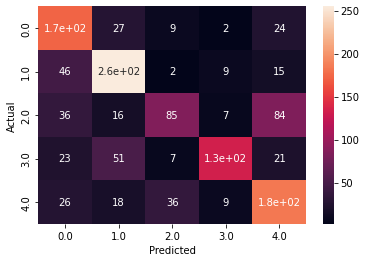

In [89]:
conf_matr = pd.crosstab(df['y_test'],df['y_pred'],rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(conf_matr, annot=True)
plt.show()